<Axes: >

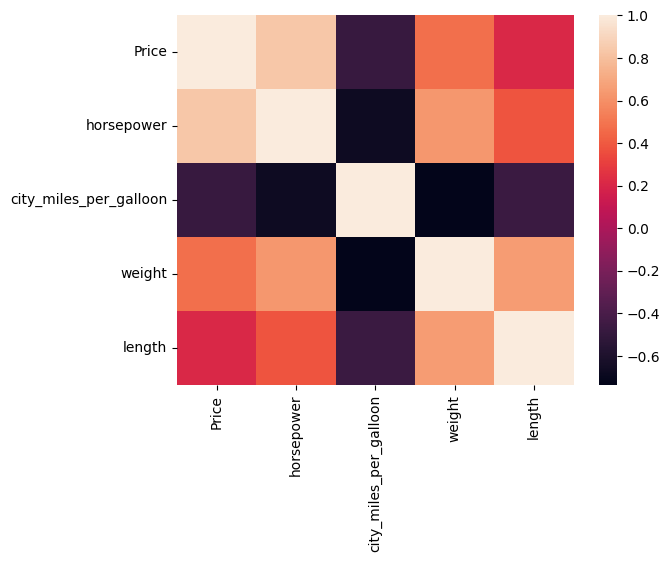

In [22]:
import pandas as pd
import numpy as np
import statistics

pineapple_juice = np.random.uniform(2,500,1000).round()
pineapple_juice.mean()
statistics.stdev(pineapple_juice)
statistics.median(pineapple_juice)
statistics.mode(pineapple_juice)
statistics.variance(pineapple_juice)

def range_data(data):
    a = max(data)-min(data)
    return a

range_data(pineapple_juice)
#median is the 50th percentile
np.percentile(pineapple_juice, 50)
np.percentile(pineapple_juice,25)
np.percentile(pineapple_juice,75)

import pandas as np
cars = pd.read_csv("C:\\Users\\Khush Bhuta\\Desktop\\python_workspace\\data\\cars.csv")
cars.head()
cars.describe()
#subsetting = cars.iloc[:,['horsepower','city_miles_per_gallon']].corr()
#subsetting

cars.cylenders.value_counts()
cars.columns
cars[['Price','horsepower','city_miles_per_galloon','weight','length']]
#cars[['Price','horsepower','city_miles_per_galloon','weight','length']].corr()

#dropping NA values
cars_clean = cars.dropna(axis=0)
cars_clean[['Price','horsepower','city_miles_per_galloon','weight','length']]
cars_clean[['Price','horsepower','city_miles_per_galloon','weight','length']].corr()

#finding correlation between individual columns

correlation_data_clean = cars_clean[['Price','horsepower','city_miles_per_galloon','weight','length']].corr()
correlation_data_clean.loc['horsepower','weight']

import seaborn as sns
sns.heatmap(correlation_data_clean)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
pricing = pd.read_excel('C:\\Users\\Khush Bhuta\\Desktop\\python_workspace\\data\\pricing.xlsx')

In [25]:
pricing

,Demand,Price
0,400,10.0
1,380,12.0
2,370,13.0
3,390,11.0
4,395,10.5
5,410,9.0
6,430,7.0
7,412,8.8
8,370,13.0
9,378,12.2


In [26]:
X = pricing.Price.values.reshape(-1,1)
Y = pricing.Demand

In [27]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [28]:
model.coef_

array([-10.])

In [29]:
model.intercept_

500.0

In [30]:
pricing['Prediction'] = model.predict(X)

In [31]:
pricing

,Demand,Price,Prediction
0,400,10.0,400.0
1,380,12.0,380.0
2,370,13.0,370.0
3,390,11.0,390.0
4,395,10.5,395.0
5,410,9.0,410.0
6,430,7.0,430.0
7,412,8.8,412.0
8,370,13.0,370.0
9,378,12.2,378.0


In [42]:
from scipy.stats import norm,normaltest,kstest as st
import scipy.stats as st
skus = pd.read_csv("C:\\Users\\Khush Bhuta\\Desktop\\python_workspace\\data\\sku_distributions.csv")

In [48]:
dist_names = ["norm","exponweib","weibull_max","weibull_min","pareto","genextreme"]
apple_juice = np.array(skus["apple_juice"])
mean = apple_juice.mean()
sd = apple_juice.std()
kstest(apple_juice,'norm',args=(mean,sd))

KstestResult(statistic=0.04009719884515317, pvalue=0.6429826442155495, statistic_location=100, statistic_sign=1)

In [49]:
results = []

In [50]:
parameters= {}

In [51]:
norm_param = getattr(st,'norm')
norm_param.fit(apple_juice)

(100.73873873873873, 20.190256493370235)

In [52]:
for dist in dist_names:
    param=getattr(st,dist)
    fitting = param.fit(apple_juice)
    test = kstest(apple_juice,dist,args = fitting)
    results.append([dist,test])
    print("the result for dist "+dist+" is "+str(test[1]))

the result for dist norm is 0.6423077067552097
the result for dist exponweib is 1.1842591378527991e-172
the result for dist weibull_max is 2.2685136143704785e-247
the result for dist weibull_min is 0.34810501680216566
the result for dist pareto is 1.6172750367237305e-31
the result for dist genextreme is 0.26068355451614744
